In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
data = pd.read_csv('data/county_mobility_report.csv')
data.head()

,STATE,COUNTY,date,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME
0,Alabama,Autauga County,2/15/20,5.0,7.0,NaN,NaN,-4.0,NaN
1,Alabama,Autauga County,2/16/20,0.0,1.0,-23.0,NaN,-4.0,NaN
2,Alabama,Autauga County,2/17/20,8.0,0.0,NaN,NaN,-27.0,5.0
3,Alabama,Autauga County,2/18/20,-2.0,0.0,NaN,NaN,2.0,0.0
4,Alabama,Autauga County,2/19/20,-2.0,0.0,NaN,NaN,2.0,0.0


In [9]:
data["Label"] = data["PARKS"].shift(-1)

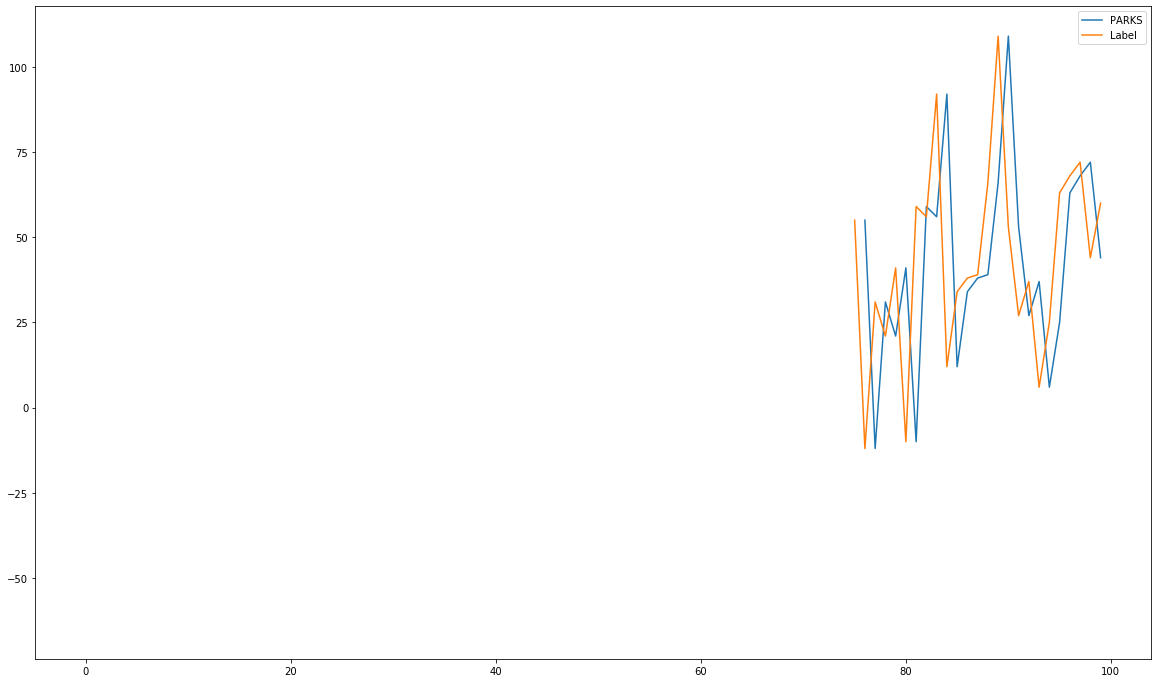

In [11]:
data[["PARKS", "Label"]].iloc[:100].plot(figsize=(20,12));

In [12]:
#data.dropna(inplace=True)
data.tail()

,STATE,COUNTY,date,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME,Label
201686,Wyoming,Weston County,4/24/20,NaN,NaN,NaN,NaN,-29.0,NaN,NaN
201687,Wyoming,Weston County,4/27/20,NaN,NaN,NaN,NaN,-35.0,NaN,NaN
201688,Wyoming,Weston County,4/28/20,NaN,NaN,NaN,NaN,-38.0,NaN,NaN
201689,Wyoming,Weston County,4/29/20,NaN,NaN,NaN,NaN,-42.0,NaN,NaN
201690,Wyoming,Weston County,4/30/20,NaN,NaN,NaN,NaN,-39.0,NaN,NaN


In [13]:
df = pd.DataFrame()
df["Parks"] = data["PARKS"]
df["label"] = data["Label"]
df.dropna(inplace=True)
df

,Parks,label
76,55.0,-12.0
77,-12.0,31.0
78,31.0,21.0
79,21.0,41.0
80,41.0,-10.0
...,...,...
201491,-62.0,-71.0
201492,-71.0,-71.0
201493,-71.0,-52.0
201494,-52.0,-48.0


In [14]:
# 70% train, 10% val, 20% test

train_i = int(len(df.index) * 0.7)
val_i = int(len(df.index) * 0.8)

train_x = df["Parks"].iloc[:train_i].to_numpy()
train_y = df["label"].iloc[:train_i].to_numpy()

val_x = df["Parks"].iloc[train_i:val_i].to_numpy()
val_y = df["label"].iloc[train_i:val_i].to_numpy()

test_x = df["Parks"].iloc[val_i:].to_numpy()
test_y = df["label"].iloc[val_i:].to_numpy()

# df["column"] => pd series,  df["column", "column2"] is wrong
# df[["column"]] =>pd Dataframe, df[["column", "column2"]] is right

print(train_x.shape)
print(train_x)
print(train_y)

(31889,)
[ 55. -12.  31. ...   5.  17.  25.]
[-12.  31.  21. ...  17.  25.   7.]


In [15]:
#(sample, input_shape = features)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
epochs = 100
#learning_rate = 0.0001

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
                           #loss=tf.keras.losses.MeanSquaredError(),
              metrics = ['acc'])
             #metric=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [16]:
#model.fit(train_x, train_y, epochs=100)
model.fit(
    train_x,
    train_y,
    epochs=epochs,
    validation_data = (val_x,val_y)
)

Train on 31889 samples, validate on 4555 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
31889/31889 [==============================] - 3s 81us/sample - loss: 1519.9977 - acc: 0.0139 - val_loss: 1372.7922 - val_acc: 0.0119
Epoch 2/100
31889/31889 [==============================] - 2s 57us/sample - loss: 1202.2749 - acc: 0.0135 - val_loss: 1360.0201 - val_acc: 0.0123
Epoch 3/100
31889/31889 [==============================] - 2s 52us/sample - loss: 1195.4502 - acc: 0.0133 - val_loss: 1347.9060 - val_acc: 0.0125- acc: 0.01
Epoch 4/100
31889/31889 [==============================] - 2s 49us/sample - loss: 1190.8411 - acc: 0.0131 - val_loss: 1358.6682 - val_acc: 0.0114
Epoch 5/100
31889/31889 [==============================] - 1s 45us/sample - loss: 1187.3907 - acc: 0.0130 - val_loss: 1338.9632 - val_acc: 0.0116
Epoch 6/100
31889/31889 [==============================] - 1s 47us/sample - loss: 1184.7389 - acc: 0.0130 - val_loss: 1341.8615 - val_acc: 0.0116
Epoch 7/100
3188

Epoch 54/100
31889/31889 [==============================] - 3s 93us/sample - loss: 1173.8635 - acc: 0.0130 - val_loss: 1333.1013 - val_acc: 0.0116
Epoch 55/100
31889/31889 [==============================] - 4s 127us/sample - loss: 1173.9869 - acc: 0.0131 - val_loss: 1328.1737 - val_acc: 0.0116
Epoch 56/100
31889/31889 [==============================] - 4s 134us/sample - loss: 1174.2604 - acc: 0.0130 - val_loss: 1326.5116 - val_acc: 0.0114
Epoch 57/100
31889/31889 [==============================] - 5s 145us/sample - loss: 1173.4246 - acc: 0.0130 - val_loss: 1324.1146 - val_acc: 0.0116
Epoch 58/100
31889/31889 [==============================] - 3s 89us/sample - loss: 1173.9787 - acc: 0.0129 - val_loss: 1331.5235 - val_acc: 0.0114
Epoch 59/100
31889/31889 [==============================] - 2s 65us/sample - loss: 1174.3549 - acc: 0.0130 - val_loss: 1331.4917 - val_acc: 0.0114
Epoch 60/100
31889/31889 [==============================] - 2s 54us/sample - loss: 1173.6882 - acc: 0.0130 - val_lo